## Coding

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

# from google.colab import files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-non

### Fine-Tuning

In [ ]:
from datasets import load_dataset, load_metric, DatasetDict
from transformers import pipeline
import numpy as np

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

# dataset_path = '/content/drive/My Drive/scientific_papers'


In [ ]:
# #using model bart-large, ~400 million parameters
# device = 'gpu'
# model_ckpt = 'facebook/bart-large-cnn'
# tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [ ]:
# using T5-small, ~60 million parameters
device = 'gpu'
model_ckpt = 't5-small'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# # using distilbart, =305510400 parameters
# device = 'gpu'
# model_ckpt = 'sshleifer/distilbart-cnn-12-6'
# tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

In [ ]:
train_split = "train[:3%]"
validation_split = "validation[:3%]"
test_split = "test[:3%]"

# Load the dataset splits with the specified fractions
scPapers = load_dataset('scientific_papers', 'arxiv', split={'train': train_split, 'validation': validation_split, 'test': test_split})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/203037 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6436 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6440 [00:00<?, ? examples/s]

In [ ]:
scPapers

DatasetDict({
    train: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 6091
    })
    validation: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 193
    })
    test: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 193
    })
})

In [ ]:
scPapers['train'][0]

{'article': 'additive models @xcite provide an important family of models for semiparametric regression or classification . some reasons for the success of additive models are their increased flexibility when compared to linear or generalized linear models and their increased interpretability when compared to fully nonparametric models .\nit is well - known that good estimators in additive models are in general less prone to the curse of high dimensionality than good estimators in fully nonparametric models .\nmany examples of such estimators belong to the large class of regularized kernel based methods over a reproducing kernel hilbert space @xmath0 , see e.g. @xcite . in the last years\nmany interesting results on learning rates of regularized kernel based models for additive models have been published when the focus is on sparsity and when the classical least squares loss function is used , see e.g. @xcite , @xcite , @xcite , @xcite , @xcite , @xcite and the references therein . of 

In [ ]:
article_len = [len(x['article'].split()) for x in scPapers['train']]
abstract_len = [len(x['abstract'].split()) for x in scPapers['train']]

array([[<Axes: title={'center': 'Article Length'}>,
        <Axes: title={'center': 'Abstract Length'}>]], dtype=object)

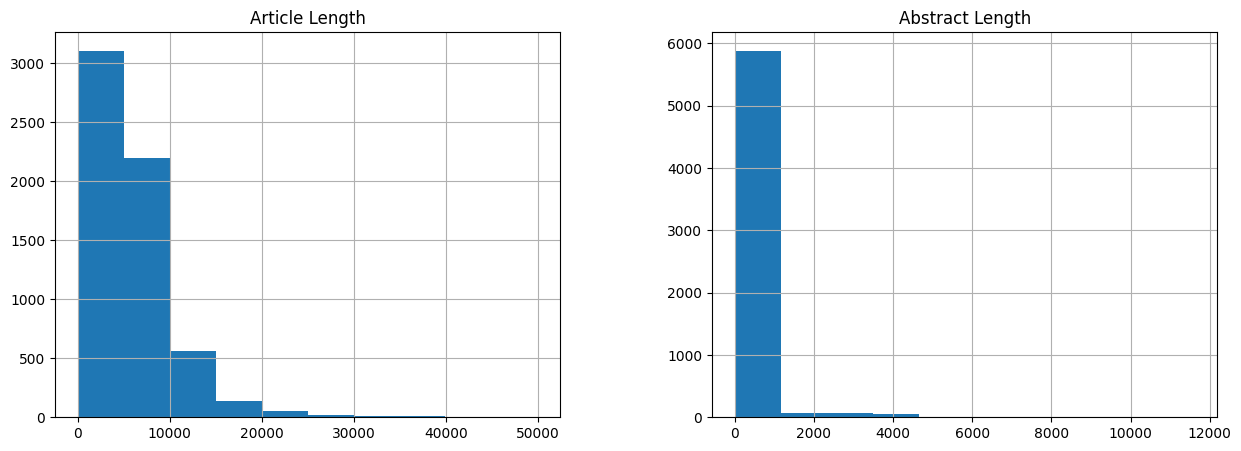

In [ ]:
import pandas as pd

data = pd.DataFrame([article_len, abstract_len]).T
data.columns = ['Article Length', 'Abstract Length']

data.hist(figsize=(15,5)) # notice that # of tokes will be >512

In [ ]:
def get_feature(batch):
  encodings = tokenizer(batch['article'], text_target=batch['abstract'],
                        max_length=1024, truncation=True)

  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels']}

  return encodings

In [ ]:
scPapers_pt = scPapers.map(get_feature, batched=True)

Map:   0%|          | 0/6091 [00:00<?, ? examples/s]

Map:   0%|          | 0/193 [00:00<?, ? examples/s]

Map:   0%|          | 0/193 [00:00<?, ? examples/s]

In [ ]:
scPapers

DatasetDict({
    train: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 6091
    })
    validation: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 193
    })
    test: Dataset({
        features: ['article', 'abstract', 'section_names'],
        num_rows: 193
    })
})

In [ ]:
columns = ['input_ids', 'labels', 'attention_mask']
scPapers_pt.set_format(type='torch', columns=columns)

In [ ]:
from transformers import DataCollatorForSeq2Seq
from google.colab import drive
drive.mount('/content/drive')

model.cuda()
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/My Drive/NLP",
    evaluation_strategy="steps",
    num_train_epochs=1,  # You can increase this when memory allows
    save_steps=10000,
    learning_rate=5e-6,  # Defaults to 5e-5
    per_device_train_batch_size=1,  # Reduce batch size further
    gradient_accumulation_steps=16,  # Increase gradient accumulation
    fp16=True,  # Enable mixed precision training
)

!pip install rouge_score
rouge_metric = load_metric("rouge")
def compute_metrics(eval_pred):
    predictions, labels = eval_pred.predictions, eval_pred.label_ids

    # Decode the predicted and reference summaries
    predictions = [tokenizer.decode(pred, skip_special_tokens=True) for pred in predictions]
    references = [tokenizer.decode(ref, skip_special_tokens=True) for ref in labels]

    # Calculate ROUGE scores
    rouge_output = rouge_metric.compute(predictions=predictions, references=references)

    # Extract the relevant ROUGE scores
    rouge_scores = {
        #ROUGE-2 (bigram) scores:
        "rouge2_precision": rouge_output["rouge2"].mid.precision,
        "rouge2_recall": rouge_output["rouge2"].mid.recall,
        "rouge2_fmeasure": rouge_output["rouge2"].mid.fmeasure,
        #Longest Common Subsequence scores:
        "rougeL_precision": rouge_output["rougeL"].mid.precision,
        "rougeL_recall": rouge_output["rougeL"].mid.recall,
        "rougeL_fmeasure": rouge_output["rougeL"].mid.fmeasure,
    }
    print("ROUGE-2 Precision:", rouge_scores["rouge2_precision"])
    print("ROUGE-L Precision:", rouge_scores["rougeL_precision"])
    return rouge_scores

trainer = Trainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=data_collator,
    train_dataset = scPapers_pt['train'],
    eval_dataset = scPapers_pt['validation'],
    compute_metrics=compute_metrics
    )



In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()
trainer.train()

Step,Training Loss,Validation Loss


OutOfMemoryError: ignored

In [ ]:
trainer.save_model("/content/drive/My Drive/NLP/final_model")

In [ ]:
# Getting all the rouge scores
from tqdm.auto import tqdm

def evaluate_model_in_batches(model, eval_dataset, tokenizer, batch_size=8):
    model.eval()
    rouge_metric = load_metric("rouge")
    predictions = []
    references = []

    for i in tqdm(range(0, len(eval_dataset), batch_size)):
        batch_articles = [article for article in eval_dataset['article'][i:i+batch_size]]
        batch_abstracts = [abstract for abstract in eval_dataset['abstract'][i:i+batch_size]]

        inputs = tokenizer(batch_articles, padding=True, truncation=True, max_length=512, return_tensors="pt").to(model.device)

        with torch.no_grad():
            outputs = model.generate(**inputs)

        decoded_preds = [tokenizer.decode(pred, skip_special_tokens=True) for pred in outputs]
        decoded_labels = [abstract for abstract in batch_abstracts]

        predictions.extend(decoded_preds)
        references.extend(decoded_labels)

        # Clear memory after each batch
        torch.cuda.empty_cache()

    # Compute ROUGE scores
    rouge_output = rouge_metric.compute(predictions=predictions, references=references)
    return rouge_output

#For the pre-trained model:
pre_trained_model = AutoModelForSeq2SeqLM.from_pretrained('facebook/bart-large-cnn') # replace with current model
rouge_scores_pretrained = evaluate_model_in_batches(pre_trained_model, scPapers_pt['validation'], tokenizer, batch_size=2)

#For the fine-tuned model:
fine_tuned_model = AutoModelForSeq2SeqLM.from_pretrained('/content/drive/My Drive/NLP/bartlarge_1epoch')
rouge_scores_fine_tuned = evaluate_model_in_batches(fine_tuned_model, scPapers_pt['validation'], tokenizer, batch_size=2)

# rouge_scores = evaluate_model_in_batches(model, scPapers_pt['validation'], tokenizer, batch_size=2)

# Initialize a dictionary to hold the data
data = {}
data_fineTune = {}

# Extract metrics for each ROUGE score
for rouge_type in ["rouge1", "rouge2", "rougeL"]:
    data[f'{rouge_type}_precision'] = rouge_scores_pretrained[rouge_type].mid.precision
    data[f'{rouge_type}_recall'] = rouge_scores_pretrained[rouge_type].mid.recall
    data[f'{rouge_type}_fmeasure'] = rouge_scores_pretrained[rouge_type].mid.fmeasure

for rouge_type in ["rouge1", "rouge2", "rougeL"]:
    data_fineTune[f'{rouge_type}_precision'] = rouge_scores_fine_tuned[rouge_type].mid.precision
    data_fineTune[f'{rouge_type}_recall'] = rouge_scores_fine_tuned[rouge_type].mid.recall
    data_fineTune[f'{rouge_type}_fmeasure'] = rouge_scores_fine_tuned[rouge_type].mid.fmeasure

# Create a DataFrame from the dictionary
df_preTrained = pd.DataFrame([data], index=["Bart large"])  #Replace index with model's name
df_fineTune = pd.DataFrame([data_fineTune], index=["Bart large"])

print("Rouge Socres for the pre-trained model:\n")
print(df_preTrained)
print(rouge_scores_pretrained)

print("Rouge Socres for the fine-tuned model:\n")
print(df_fineTune)
print(rouge_scores_fine_tuned)


In [ ]:
pipe = pipeline('summarization', model='/content/drive/My Drive/NLP/final_model')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, "max_length": 128}

text ="""
The focus of the present work is the so-called PCA-Net, a methodology which combines
ideas from principal component analysis with neural networks (Hesthaven and Ubbiali,
2018; Bhattacharya et al., 2021). Principal component analysis (PCA) is a standard tool
for dimension reduction in high-dimensional statistics and unsupervised learning (Jolliffe,
2002). In (Bhattacharya et al., 2021), a combination of PCA with neural networks has been
proposed as a data-driven operator learning framework. As indicated above, the goal of
operator learning is to approximate an unknown operator Ψ†
: X → Y, mapping between
two infinite-dimensional spaces X and Y. Given data in the form of pairs of inputs and
outputs, we seek to determine an accurate, data-driven approximation of Ψ†
. The PCA-Net
operator learning architecture achieves this goal by (i) using PCA to reduce the dimensions
of the input and output spaces and (ii) approximating a map between the resulting finitedimensional latent spaces (Bhattacharya et al., 2021). First analysis, including a universal
approximation result, have been derived in (Bhattacharya et al., 2021). Furthermore, in
the same work, the efficacy of the proposed architecture has been demonstrated empirically
for prototypical problems, including the solution operator of the viscous Burgers equation
and the Darcy flow equation. However, so far, a detailed mathematical analysis providing
a theoretical underpinning for this empirically observed efficiency of PCA-Net, has been
outstanding.
The present work fills this gap by developing relevant approximation theory for PCANet. The main contributions of this paper are the following:
• Universal approximation: We prove a novel universal approximation theorem for
PCA-Net, Theorem 6, under significantly relaxed conditions on the distribution of the
data-generating measure and the underlying operator Ψ†
compared to previous work;
the universality of PCA-Net is here shown under natural minimal conditions, which
are in fact necessary for PCA to be well-defined on the input and output spaces.
• Curse of parametric complexity: A rigorous result is proven which demonstrates
that the curse of parametric complexity, an infinite-dimensional scaling limit of the
conventional curse of dimensionality, cannot be overcome by PCA-Net in general (cp.
Theorem 9); more precisely, this result shows that it is impossible to derive algebraic
complexity bounds when considering general classes of operators, such as the class of
all Lipschitz- or even C
k
-continuous operators. Hence, we conclude that at this level
of generality, the curse is unavoidable.
• Overcoming the curse of parametric complexity: Given the negative result on
the general curse, we argue that a central challenge in operator learning is to identify
the relevant class of operators which do allow for efficient approximation by a given
operator learning framework. To gain further insight into the relevant mathematical
structure that can be leveraged by PCA-Net, we restrict attention to two prototypical
PDE operators of interest arising from the Darcy flow and Navier-Stokes equations.
In both cases, we show that PCA-Net can overcome the general curse of parametric
complexity; algebraic error and complexity estimates are established in Theorems
18 and 25, demonstrating that these operators belong to a restricted class which is
efficiently approximated by PCA-Net.
"""
print(pipe(text, **gen_kwargs))